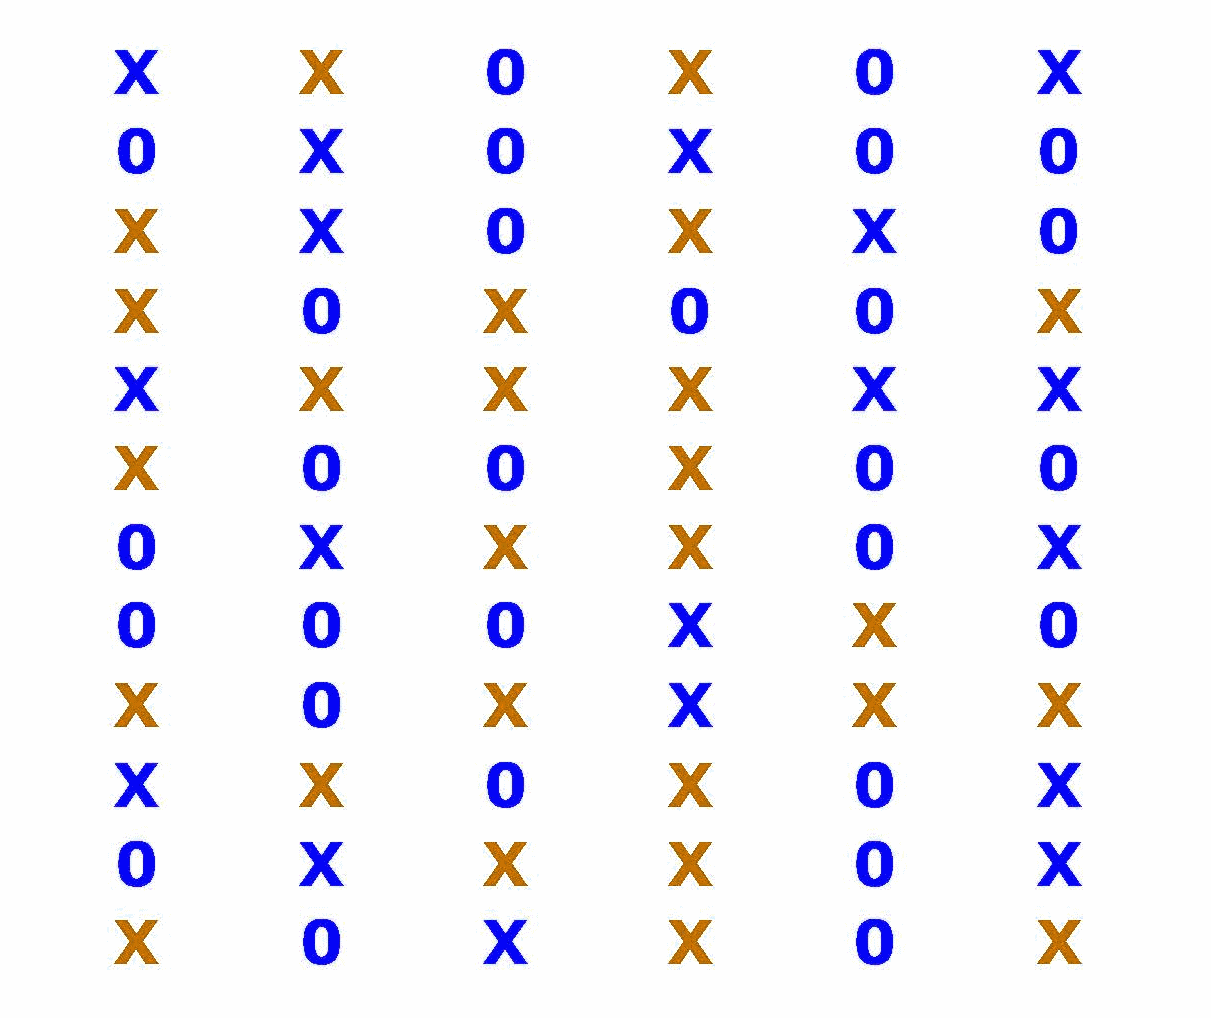

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

image = cv2.imread('redx_best.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(img)

In [2]:
lower_bound = np.array([0, 0, 0])
upper_bound = np.array([250,250,60])
image_mask = cv2.inRange(img, lower_bound, upper_bound)
cv2.imwrite("masked.png",image_mask)

True

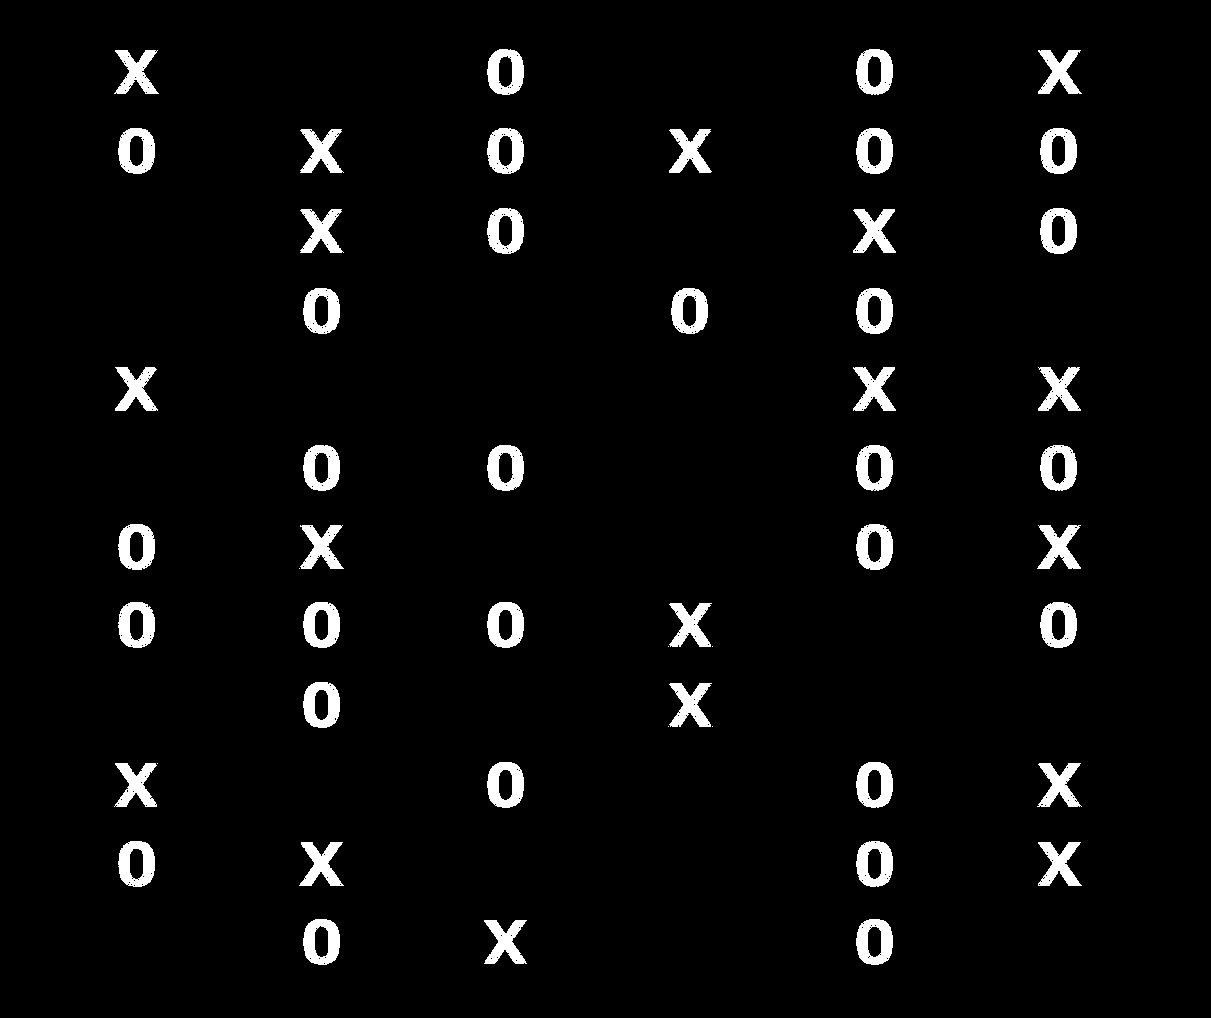

In [3]:
img_rgb = cv2.imread('masked.png')
cv2_imshow(img_rgb)


In [4]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('template.png',0)
w, h = template.shape[::-1]

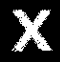

In [5]:
cv2_imshow(template)

In [6]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)

f = set()

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

    sensitivity = 90
    f.add((round(pt[0]/sensitivity), round(pt[1]/sensitivity)))

cv2.imwrite('res.png',img_rgb)

True

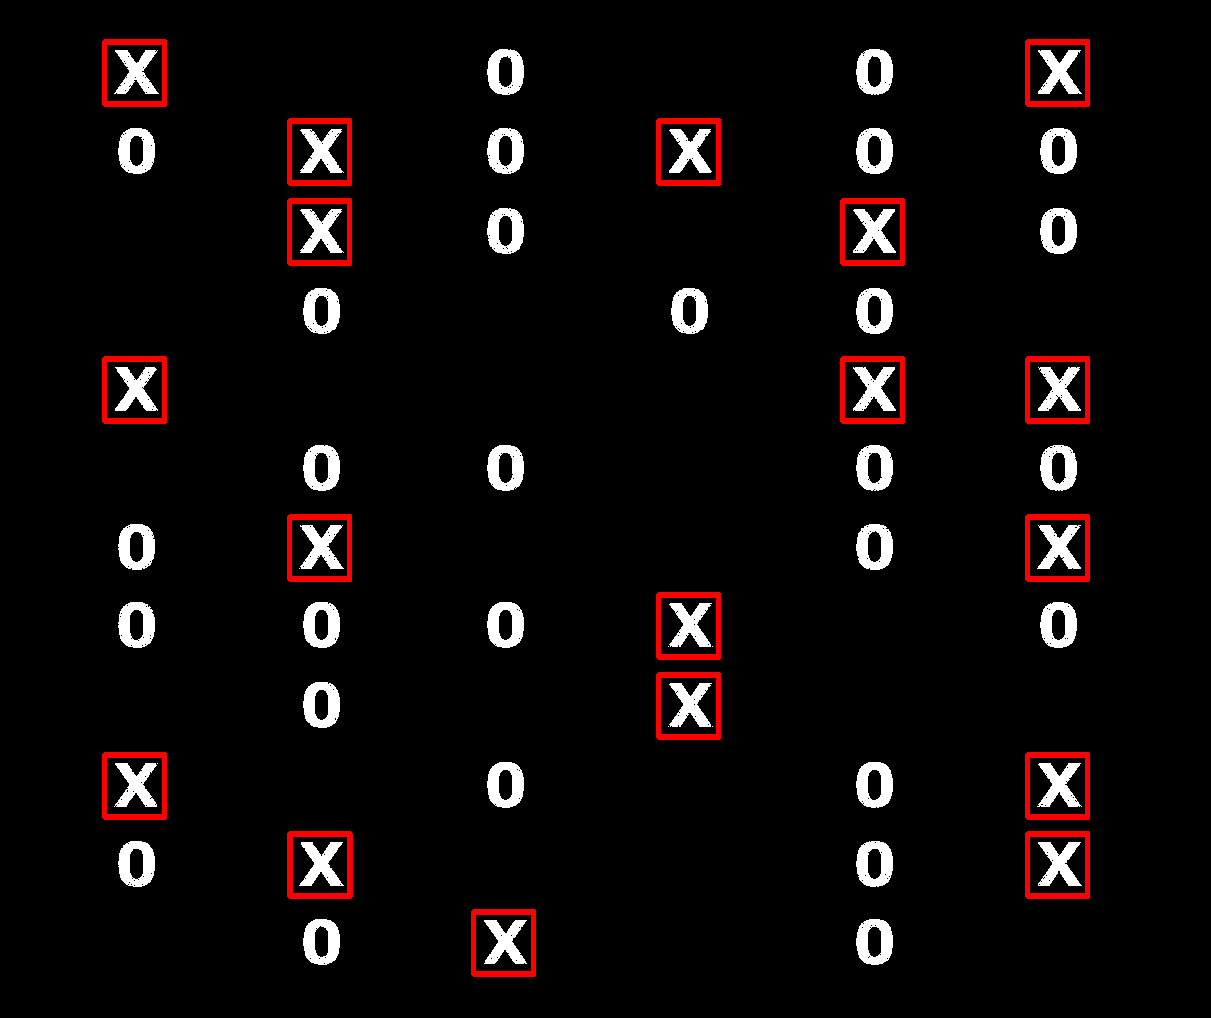

In [7]:
res_img = cv2.imread('res.png')
cv2_imshow(res_img)

In [8]:
found_count = len(f)
print("Red x number : ",found_count)

Red x number :  18
